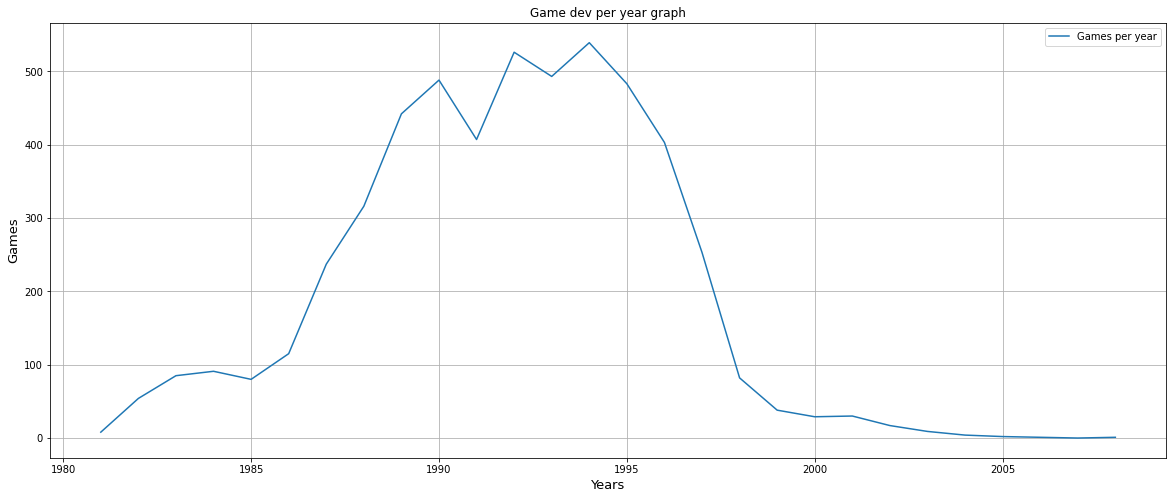

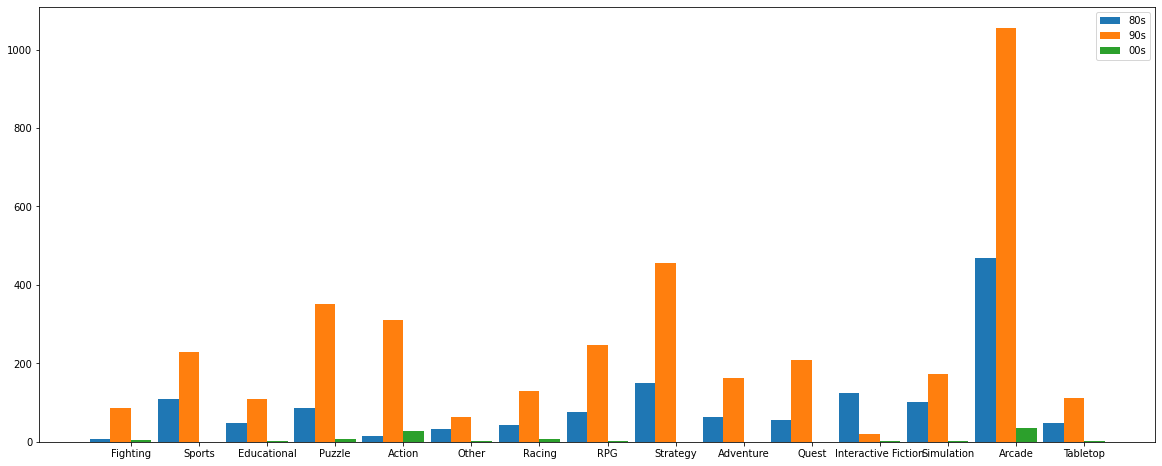

In [2]:
from lxml.html import document_fromstring
from requests import get
import matplotlib.pyplot as plt
import numpy as np


def counting_sort(array_to_sort, reverse=False):
    lst = [0] * (max(array_to_sort) + 1)
    for i in array_to_sort:
        lst[i] += 1

    srt = []
    for i in range(len(lst)):
        srt.extend([i] * lst[i])

    if reverse:
        return reversed(srt)
    return srt


def get_db():
    url = 'https://github.com/Newbilius/Old-Games_DOS_Game_Gauntlet/blob/master/GAMES.csv'
    return document_fromstring(get(url).text).xpath('//*[@class="blob-code blob-code-inner js-file-line"]/text()')


def graph_analysis(settings, main_list, counter_list):
    if settings['bar_diagram']:
        width = 0.3
        _, ax = plt.subplots(figsize=(20, 8))
        x = np.arange(len(main_list))
        ax.bar(x, counter_list[0], width, label='80s')
        ax.bar(x + width, counter_list[1], width, label='90s')
        ax.bar(x + 2 * width, counter_list[2], width, label='00s')
        plt.xticks(x + 1.5 * width, main_list)
        plt.legend()
        plt.savefig(settings['save_to'], bbox_inches='tight')
        plt.show()
    else:
        plt.figure(figsize=(20, 8))
        plt.plot(main_list, counter_list, label=settings['legend'])
        plt.xlabel(settings['x_axis'], fontsize=13)
        plt.ylabel(settings['y_axis'], fontsize=13)
        plt.title(settings['name'])
        plt.legend()
        plt.grid()
        plt.savefig(settings['save_to'], dpi=100, bbox_inches='tight')
        plt.show()


def popular_years(text):
    years = [int(line.split(';')[3][1:-1]) for line in text if line[-10:-1] != 'не издана']
    m = min(years)
    lst = [0] * (max(years) + 1 - m)
    for i in years:
        lst[i - m] += 1

    years = counting_sort(set(years))
    out = dict()
    for i in range(len(lst) - 1):
        out.update({years[i]: lst[i]})

    return out


def popular_genres_throughout_time(text):
    years = [(int(line.split(';')[3][1:-1]), line.split(';')[1][1:-1])
             for line in text if line[-10:-1] != 'не издана']

    out = set(i for _, i in years)
    eighties = [j for i, j in years if i < 1990]
    nineties = [j for i, j in years if 1990 <= i < 2000]
    zeros = [j for i, j in years if 2000 <= i]
    out = [(i, (eighties.count(i), nineties.count(i), zeros.count(i))) for i in out]

    return out


def analyze_db(db):
    gr_settings = {'name': 'Game dev per year graph',
                   'legend': 'Games per year',
                   'x_axis': 'Years',
                   'y_axis': 'Games',
                   'bar_diagram': False,
                   'save_to': 'graph_collector/Popular_game_dev_years.png'}

    popularity = popular_years(db)
    graph_analysis(gr_settings, popularity.keys(), popularity.values())

    gr_settings = {'name': 'Genres throughout the time',
                   'legend': None,
                   'x_axis': None,
                   'y_axis': None,
                   'bar_diagram': True,
                   'save_to': 'graph_collector/Popular_game_genres_throughout_time.png'}

    popularity = popular_genres_throughout_time(db)
    graph_analysis(gr_settings, tuple(i for i, _ in popularity), (tuple(i[0] for _, i in popularity),
                                                                  tuple(i[1] for _, i in popularity),
                                                                  tuple(i[2] for _, i in popularity)))


if __name__ == '__main__':
    database = get_db()
    analyze_db(database)